In [4]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np

# Loading data

In [3]:
data = np.load("data_lambda_calib_fit_nbar.npy", allow_pickle=True).item()
nbar, u_nbar, buf_amp = data["nbar"], data["u_nbar"], data["buf_amp"]

# Fit function

In [21]:
def cat_size(alpha, lam, N=100):
    a = dq.destroy(N)
    L = a @ a - alpha**2 * dq.eye(N) + lam * dq.dag(a) @ a
    H_k = dq.dag(L) @ L
    _, eig_st = jnp.linalg.eigh(H_k)
    if dq.expect(dq.parity(N), eig_st[:, 0].reshape(-1, 1)) > 0:
        return dq.expect(dq.dag(a) @ a, eig_st[:, 0].reshape(-1, 1))
    return dq.expect(dq.dag(a) @ a, eig_st[:, 1].reshape(-1, 1))

Array(3.3849819+0.j, dtype=complex64)

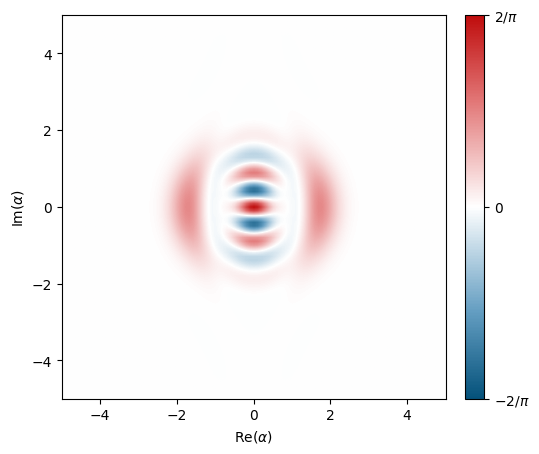

In [20]:
cat_size(3, 2)